In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv("finalListings.csv")
import missingno as msno

In [3]:
df.describe()

,id,host_is_superhost,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,bedrooms,beds,amenities,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
count,4.772400e+04,4.772400e+04,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000,...,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000,47724.000000
mean,2.277202e+07,3.913457e+04,8.936612,5.408599,1.004296,0.351982,0.709954,1.388557,1.771237,5.123795,...,7.809362,7.821180,7.769382,7.550603,0.142025,0.429176,0.882868,0.009241,0.012111,4.823255
std,1.092140e+07,2.955073e+06,65.382193,2.152371,0.191282,0.480175,3.302239,0.962502,1.266227,1.506258,...,4.172580,4.173731,4.148860,4.082984,0.491901,0.509360,0.837675,0.098914,0.109767,13.144409
min,1.419000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-123.135980,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.424729e+07,0.000000e+00,1.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,4.000000,...,9.000000,9.000000,9.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.384906e+07,0.000000e+00,1.000000,6.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,...,10.000000,10.000000,10.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.263540e+07,0.000000e+00,4.000000,7.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000
max,3.877205e+07,2.867260e+08,1094.000000,48.000000,11.000000,7.000000,49.279330,30.000000,50.000000,18.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,2.000000,2.000000,165.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47724 entries, 0 to 47723
Data columns (total 42 columns):
id                                  47724 non-null int64
name                                47724 non-null object
host_id                             47724 non-null object
host_response_rate                  47724 non-null object
host_is_superhost                   47724 non-null float64
host_total_listings_count           47724 non-null float64
host_verifications                  47724 non-null int64
host_has_profile_pic                47724 non-null int64
host_identity_verified              47724 non-null int64
city                                47724 non-null object
state                               47724 non-null object
latitude                            47724 non-null object
longitude                           47724 non-null object
is_location_exact                   47724 non-null float64
room_type                           47724 non-null object
accommodates          

In [5]:
df.id.nunique()

47724

In [6]:
def FixHostResponseRate(x):
    try:
        if float(x)<=1 and float(x)>=0:
            return(float(x))
    except:
        return(0)

In [7]:
def FixTLC(x):
    try:
        return(float(x))
    except:
        return(1)

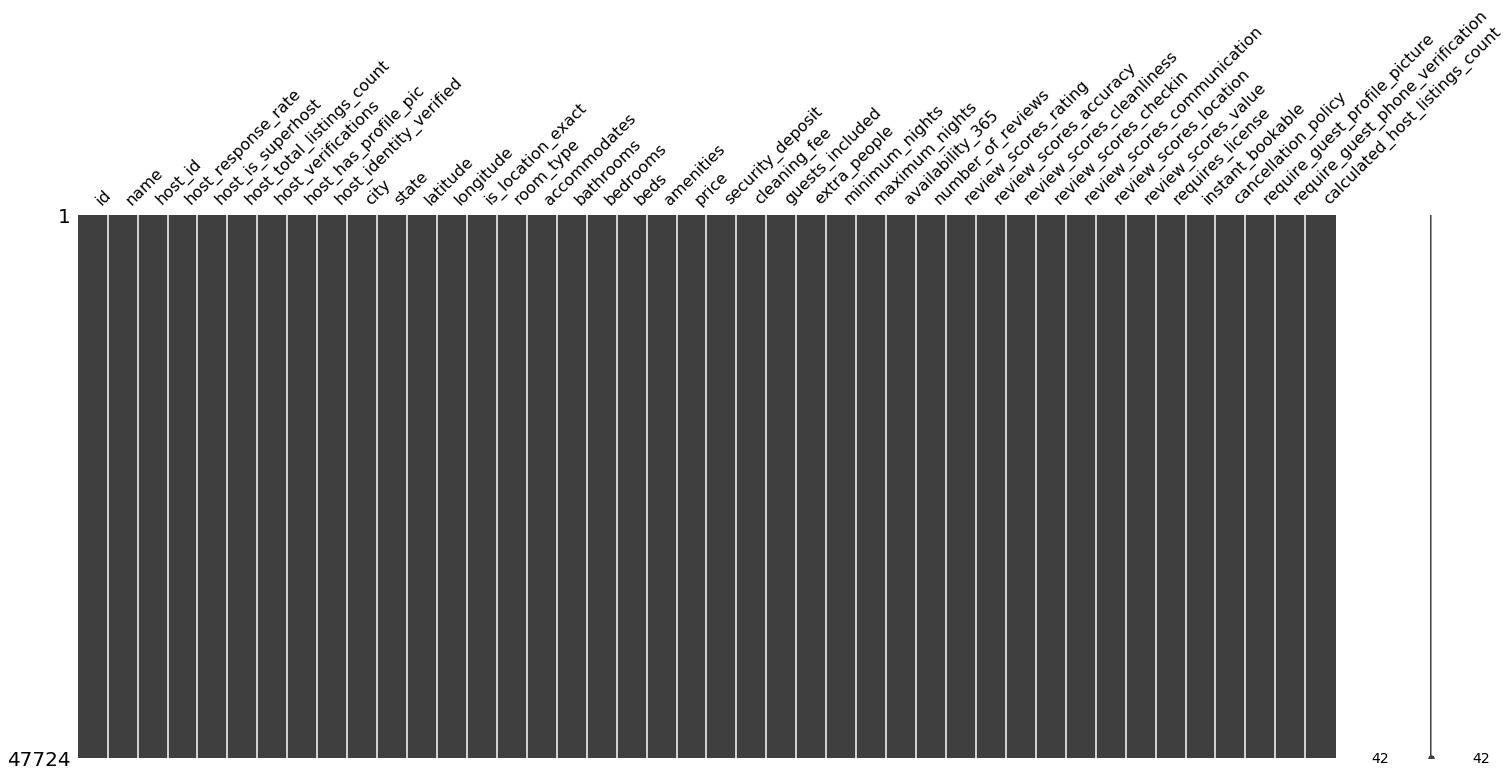

In [8]:
msno.matrix(df)

In [9]:
df['host_response_rate']=df['host_response_rate'].apply(lambda x: FixHostResponseRate(x))

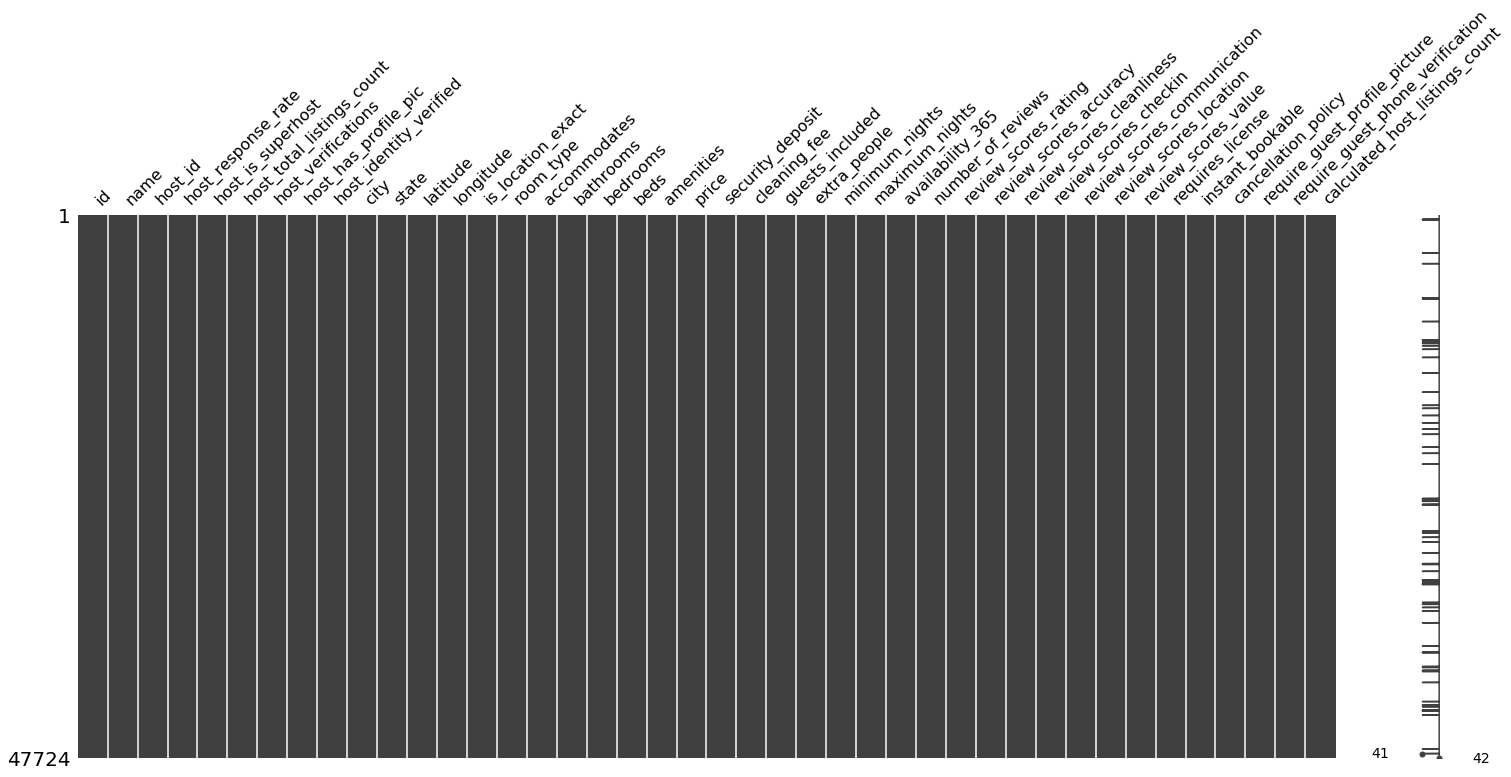

In [10]:
msno.matrix(df)

In [11]:
df=df.dropna()

In [12]:
df.shape

(47657, 42)

In [13]:
df['host_response_rate'].isna().sum()

0

In [14]:
df['host_total_listings_count']=df['host_total_listings_count'].apply(lambda x: FixTLC(x))

In [15]:
df.shape

(47657, 42)

In [16]:
def FixLL(x):
    try:
        return(float(x))
    except:
        return(0)

In [17]:
df['longitude']=df['longitude'].apply(lambda x: FixLL(x))
df['latitude']=df['latitude'].apply(lambda x: FixLL(x))


In [18]:
df=df.drop(df[df.longitude==0].index,axis=0)

In [19]:
df=df.drop(df[df.latitude==0].index,axis=0)

In [20]:
df['accommodates']=df['accommodates'].apply(lambda x: FixTLC(x))

In [21]:
def FixBath(x):
    try:
        return(float(x))
    except:
        return(1)

In [22]:
df['bathrooms']=df['bathrooms'].apply(lambda x: FixBath(x))

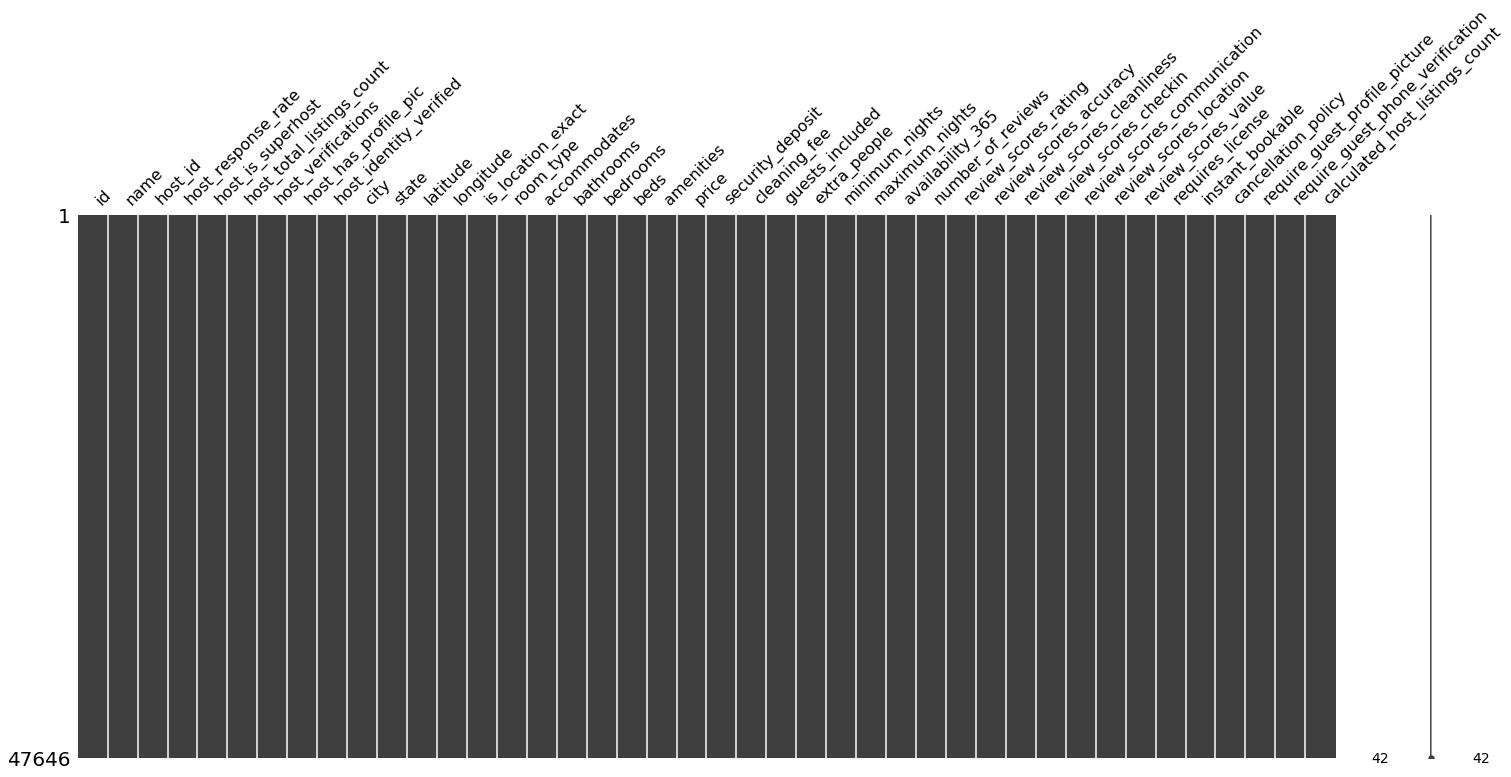

In [23]:
msno.matrix(df)

In [24]:
df = df.drop(columns=['host_has_profile_pic','host_identity_verified','calculated_host_listings_count'],axis=1)

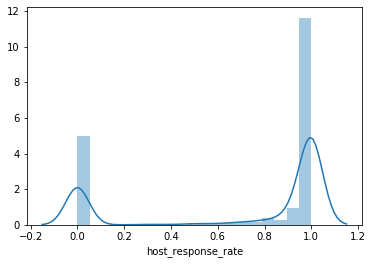

In [25]:
sns.distplot(df.host_response_rate,kde=True)

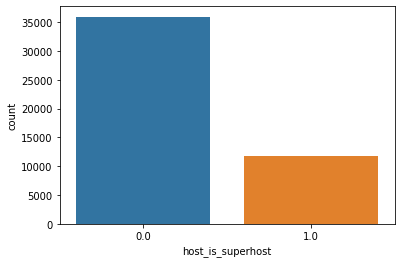

In [26]:
sns.countplot(df.host_is_superhost)

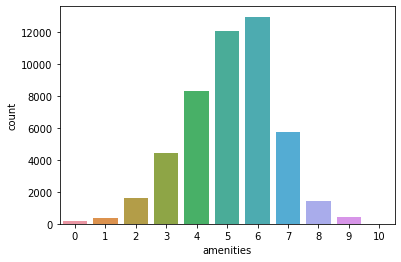

In [27]:
sns.countplot(df.amenities)

In [28]:
df.shape

(47646, 39)

In [29]:
def fixBathrooms(x):
    if x==0:
        return(1)
    else:
        return(x)

In [30]:
df.bathrooms= df.bathrooms.apply(lambda x: fixBathrooms(x))

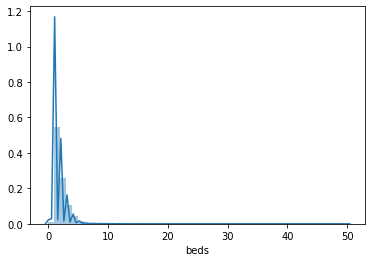

In [31]:
sns.distplot(df['beds'])

In [32]:
df['beds'].max()

50.0

In [33]:
def fixBedrooms(x):
    if x==0:
        return(1)
    else:
        return(x)

In [34]:
df.bedrooms= df.bedrooms.apply(lambda x: fixBedrooms(x))

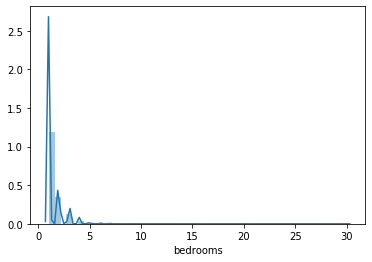

In [35]:
sns.distplot(df['bedrooms'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47646 entries, 0 to 47723
Data columns (total 39 columns):
id                                  47646 non-null int64
name                                47646 non-null object
host_id                             47646 non-null object
host_response_rate                  47646 non-null float64
host_is_superhost                   47646 non-null float64
host_total_listings_count           47646 non-null float64
host_verifications                  47646 non-null int64
city                                47646 non-null object
state                               47646 non-null object
latitude                            47646 non-null float64
longitude                           47646 non-null float64
is_location_exact                   47646 non-null float64
room_type                           47646 non-null object
accommodates                        47646 non-null float64
bathrooms                           47646 non-null float64
bedrooms       

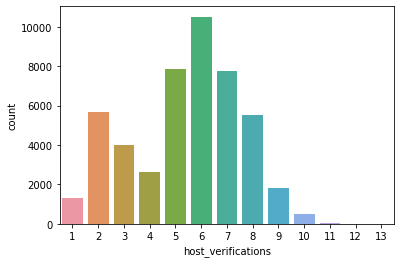

In [37]:
sns.countplot(data=df,x='host_verifications')

In [38]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('price')) #Remove b from list
#cols.pop(cols.index('x')) #Remove x from list
df = df[cols+['price']]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47646 entries, 0 to 47723
Data columns (total 39 columns):
id                                  47646 non-null int64
name                                47646 non-null object
host_id                             47646 non-null object
host_response_rate                  47646 non-null float64
host_is_superhost                   47646 non-null float64
host_total_listings_count           47646 non-null float64
host_verifications                  47646 non-null int64
city                                47646 non-null object
state                               47646 non-null object
latitude                            47646 non-null float64
longitude                           47646 non-null float64
is_location_exact                   47646 non-null float64
room_type                           47646 non-null object
accommodates                        47646 non-null float64
bathrooms                           47646 non-null float64
bedrooms       

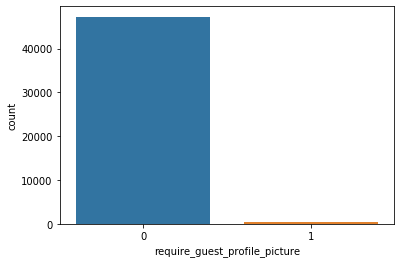

In [40]:
sns.countplot(data=df,x='require_guest_profile_picture')

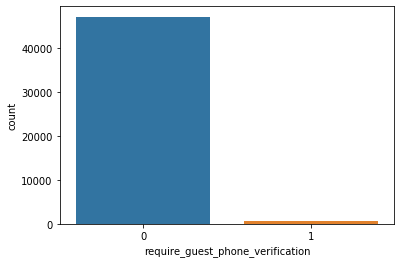

In [41]:
sns.countplot(data=df,x='require_guest_phone_verification')

In [42]:
df['guest_score']= (df['require_guest_phone_verification']*10 + df['require_guest_profile_picture']*10)/2

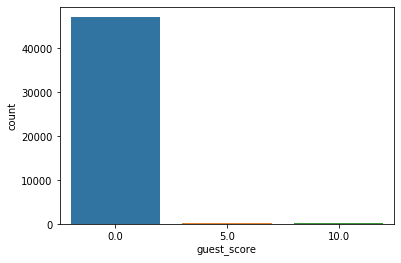

In [43]:
sns.countplot(data=df, x='guest_score')

In [44]:
df.shape

(47646, 40)

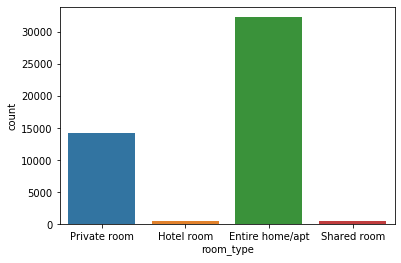

In [45]:
sns.countplot(data=df,x='room_type')

In [46]:
val=df['room_type'].value_counts()
val

Entire home/apt    32315
Private room       14203
Shared room          581
Hotel room           547
Name: room_type, dtype: int64

In [47]:
hh=val.values

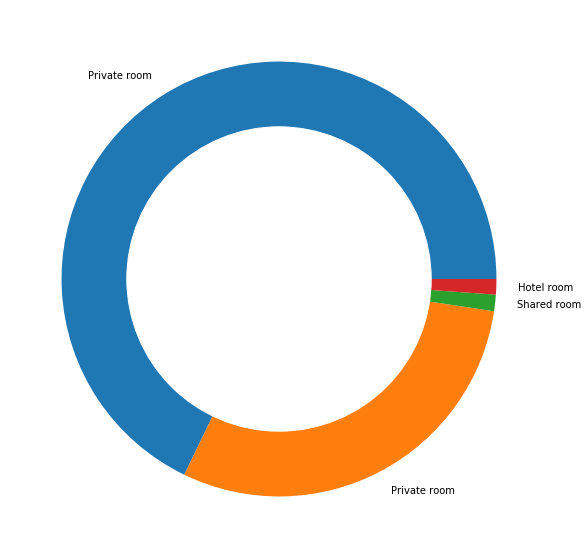

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# create data
count_of_groups=hh
names=['Private room', 'Private room', 'Shared room', 'Hotel room']

# Create a pieplot
plt.pie(count_of_groups,labels=names)
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
 
plt.show()


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47646 entries, 0 to 47723
Data columns (total 40 columns):
id                                  47646 non-null int64
name                                47646 non-null object
host_id                             47646 non-null object
host_response_rate                  47646 non-null float64
host_is_superhost                   47646 non-null float64
host_total_listings_count           47646 non-null float64
host_verifications                  47646 non-null int64
city                                47646 non-null object
state                               47646 non-null object
latitude                            47646 non-null float64
longitude                           47646 non-null float64
is_location_exact                   47646 non-null float64
room_type                           47646 non-null object
accommodates                        47646 non-null float64
bathrooms                           47646 non-null float64
bedrooms       

In [50]:
def fixSecDep(x):
    try:
        if x==-1:
            return(0)
        else:
            return(x)
    except:
        return(0)

In [51]:
df.security_deposit= df.security_deposit.apply(lambda x: fixSecDep(x))

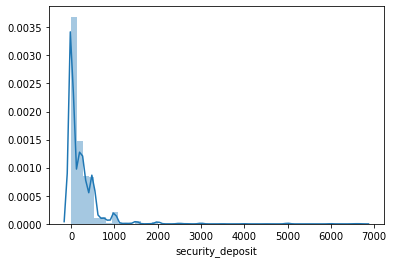

In [52]:
sns.distplot(df.security_deposit)

In [53]:
df.security_deposit.describe()

count    47646.000000
mean       238.792637
std        458.907206
min          0.000000
25%          0.000000
50%        139.000000
75%        300.000000
max       6709.000000
Name: security_deposit, dtype: float64

In [54]:
def fixCleaningfee(x):
    try:
        if x==-1:
            return(0)
        else:
            return(x)
    except:
        return(0)
    

In [55]:
df.cleaning_fee= df.cleaning_fee.apply(lambda x: fixCleaningfee(x))

In [56]:
df.cleaning_fee.describe()

count    47646.000000
mean        50.739516
std         55.782704
min          0.000000
25%         10.000000
50%         40.000000
75%         75.000000
max       4121.000000
Name: cleaning_fee, dtype: float64

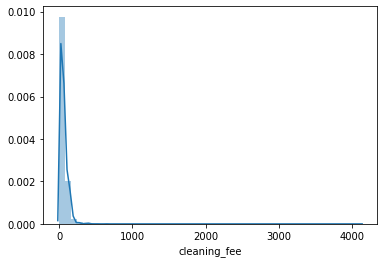

In [57]:
sns.distplot(df.cleaning_fee)

In [58]:
df=df.drop(columns=['require_guest_profile_picture','require_guest_phone_verification'],axis=1)

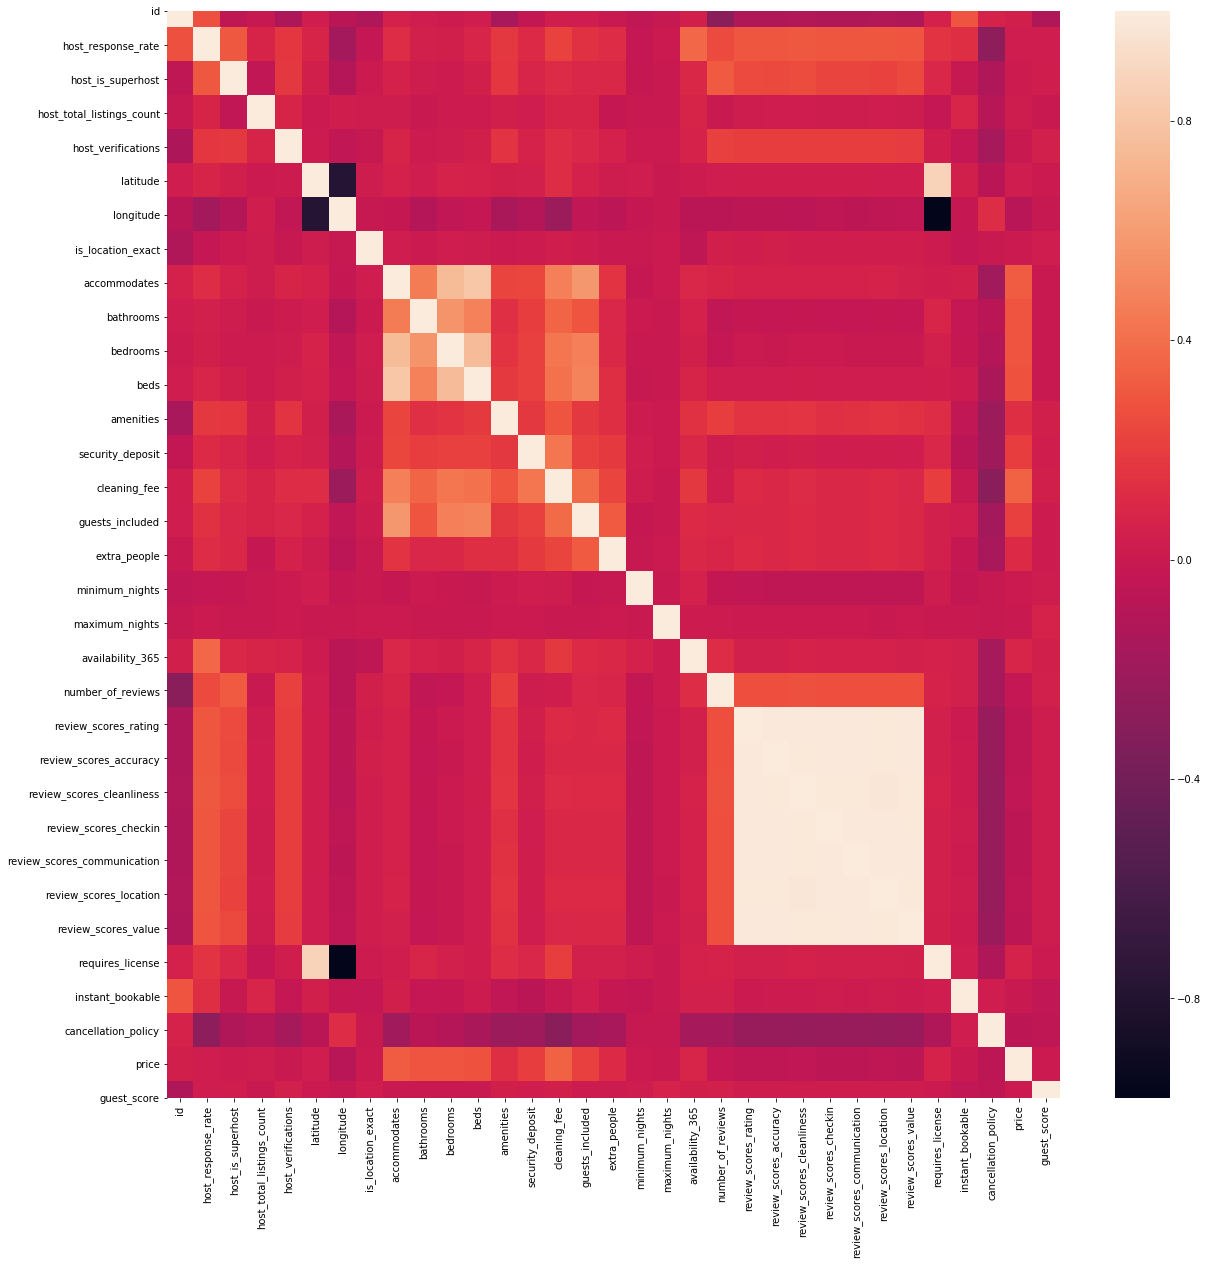

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47646 entries, 0 to 47723
Data columns (total 38 columns):
id                             47646 non-null int64
name                           47646 non-null object
host_id                        47646 non-null object
host_response_rate             47646 non-null float64
host_is_superhost              47646 non-null float64
host_total_listings_count      47646 non-null float64
host_verifications             47646 non-null int64
city                           47646 non-null object
state                          47646 non-null object
latitude                       47646 non-null float64
longitude                      47646 non-null float64
is_location_exact              47646 non-null float64
room_type                      47646 non-null object
accommodates                   47646 non-null float64
bathrooms                      47646 non-null float64
bedrooms                       47646 non-null float64
beds                           47646

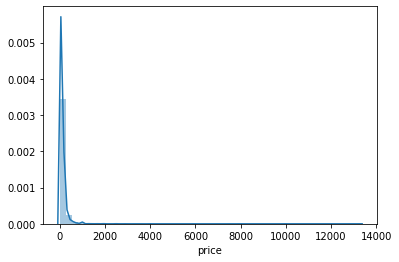

In [61]:
sns.distplot(df.price)

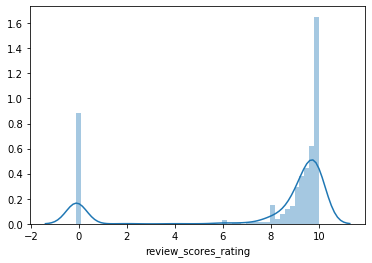

In [62]:
sns.distplot(df.review_scores_rating)

In [68]:
df.loc[df['review_scores_rating'] == -0.1, 'review_scores_rating']= df['review_scores_rating'].mean()

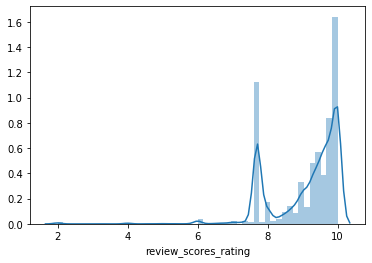

In [69]:
sns.distplot(df.review_scores_rating)

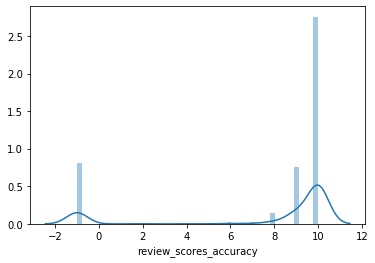

In [70]:
sns.distplot(df.review_scores_accuracy)

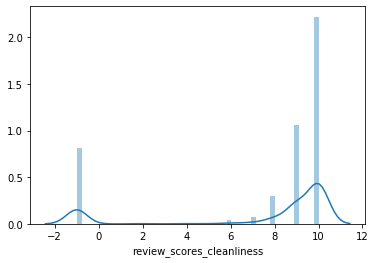

In [71]:
sns.distplot(df['review_scores_cleanliness'])

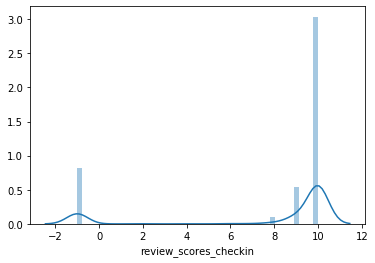

In [72]:
sns.distplot(df['review_scores_checkin'])

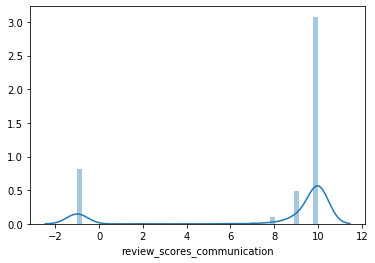

In [73]:
sns.distplot(df['review_scores_communication'])

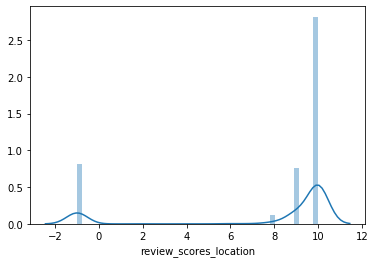

In [74]:
sns.distplot(df['review_scores_location'])

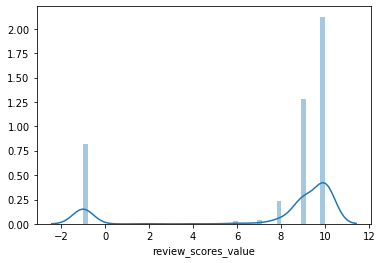

In [75]:
sns.distplot(df['review_scores_value'])

In [76]:
df['final_rev_score']=df['review_scores_value']+df['review_scores_location']+df['review_scores_communication']+df['review_scores_checkin']+df['review_scores_cleanliness']

In [77]:
df['final_rev_score']=df['final_rev_score']/5

In [78]:
df=df.drop(columns=['review_scores_value','review_scores_location','review_scores_communication','review_scores_checkin','review_scores_cleanliness'],axis=1
        )

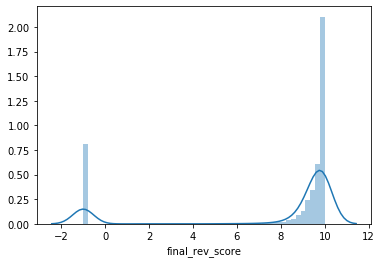

In [79]:
sns.distplot(df['final_rev_score'])

In [80]:
#We need to fix final rev=-1 because it was just added to indicate there were some trash values in the dataset in the uncleaned dataset.

In [81]:
#replaced -1 by mean of rating!
df.loc[df['final_rev_score'] == -1, 'final_rev_score']= df['final_rev_score'].mean()

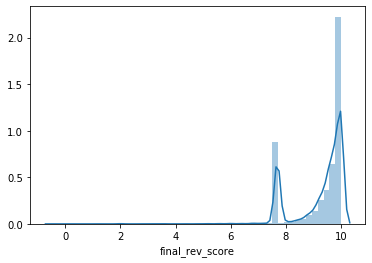

In [82]:
sns.distplot(df['final_rev_score'])

In [83]:
df.loc[df['review_scores_accuracy'] == -1, 'review_scores_accuracy']= df['review_scores_accuracy'].mean()

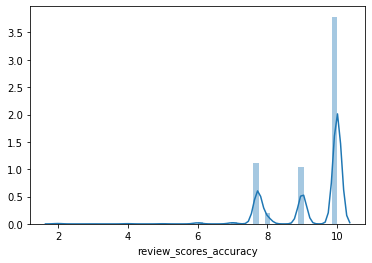

In [84]:
sns.distplot(df['review_scores_accuracy'])

In [85]:
df['review_scores_accuracy']=df['review_scores_accuracy']/10

In [86]:
df['final_rev_score']=df['final_rev_score']*df['review_scores_accuracy']

In [87]:
df=df.drop(columns=['review_scores_accuracy'],axis=1)

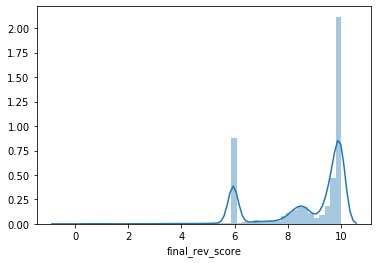

In [88]:
sns.distplot(df['final_rev_score'])

In [89]:
df['final_rev_score']=(df['final_rev_score']+df.review_scores_rating)/2

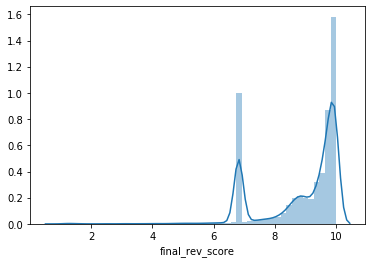

In [90]:
sns.distplot(df['final_rev_score'])

In [91]:
df=df.drop(columns=['review_scores_rating'],axis=1)

In [94]:
df=df.drop(columns=['state'],axis=1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47646 entries, 0 to 47723
Data columns (total 31 columns):
id                           47646 non-null int64
name                         47646 non-null object
host_id                      47646 non-null object
host_response_rate           47646 non-null float64
host_is_superhost            47646 non-null float64
host_total_listings_count    47646 non-null float64
host_verifications           47646 non-null int64
city                         47646 non-null object
latitude                     47646 non-null float64
longitude                    47646 non-null float64
is_location_exact            47646 non-null float64
room_type                    47646 non-null object
accommodates                 47646 non-null float64
bathrooms                    47646 non-null float64
bedrooms                     47646 non-null float64
beds                         47646 non-null float64
amenities                    47646 non-null int64
security_deposit 

In [96]:
df.shape

(47646, 31)

In [98]:
df.loc[df['availability_365'] == 0, 'availability_365']= df['availability_365'].mean()

In [99]:
df['availability_365']=df['availability_365']/365

In [101]:
df['booked']=1-df['availability_365']

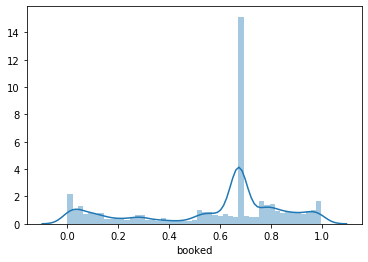

In [103]:
sns.distplot(df['booked'])

In [104]:
df=df.drop(columns=['availability_365'],axis=1)

In [105]:
df.shape

(47646, 31)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47646 entries, 0 to 47723
Data columns (total 31 columns):
id                           47646 non-null int64
name                         47646 non-null object
host_id                      47646 non-null object
host_response_rate           47646 non-null float64
host_is_superhost            47646 non-null float64
host_total_listings_count    47646 non-null float64
host_verifications           47646 non-null int64
city                         47646 non-null object
latitude                     47646 non-null float64
longitude                    47646 non-null float64
is_location_exact            47646 non-null float64
room_type                    47646 non-null object
accommodates                 47646 non-null float64
bathrooms                    47646 non-null float64
bedrooms                     47646 non-null float64
beds                         47646 non-null float64
amenities                    47646 non-null int64
security_deposit 

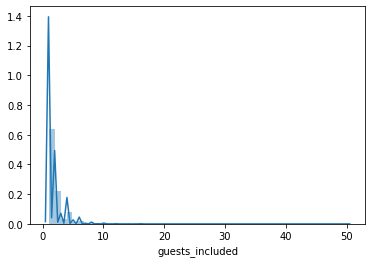

In [107]:
sns.distplot(df['guests_included'])

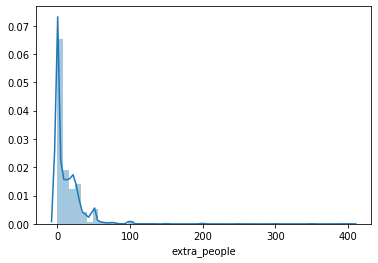

In [108]:
sns.distplot(df['extra_people'])

In [109]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('price'))
df = df[cols+['price']]

In [110]:
df.to_csv('RecommendListings.csv')